### Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [1]:
#=======================================================================================
# Import libaries:
#=======================================================================================

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from scipy.stats import norm
from scipy import stats

###  1) Import Data

In [3]:
df =pd.read_csv("train.csv",header= 0 , sep=',')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.describe([0.25,0.50,0.75,0.95,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
def get_missingvalues():
    return round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] 


In [9]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(get_missingvalues())



Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


18 features have missing values, out of which 5 features have more than 45% missing values and 3 features have more than 90% missing values.

###  2) Exploratory Data Analysis

In [10]:
# Checking the number of numerical features and the number of categorical features
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Numerical Features:\n',num_features)
print('\n Categorical Features:\n',cat_features)


Numerical Features:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

 Categorical Features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fir

In [11]:
# Checking the number of numerical features and the number of categorical features
print('Number of Numerical variables: ', len(num_features))
print('Number of Categorical variables: ', len(cat_features))

Number of Numerical variables:  38
Number of Categorical variables:  43


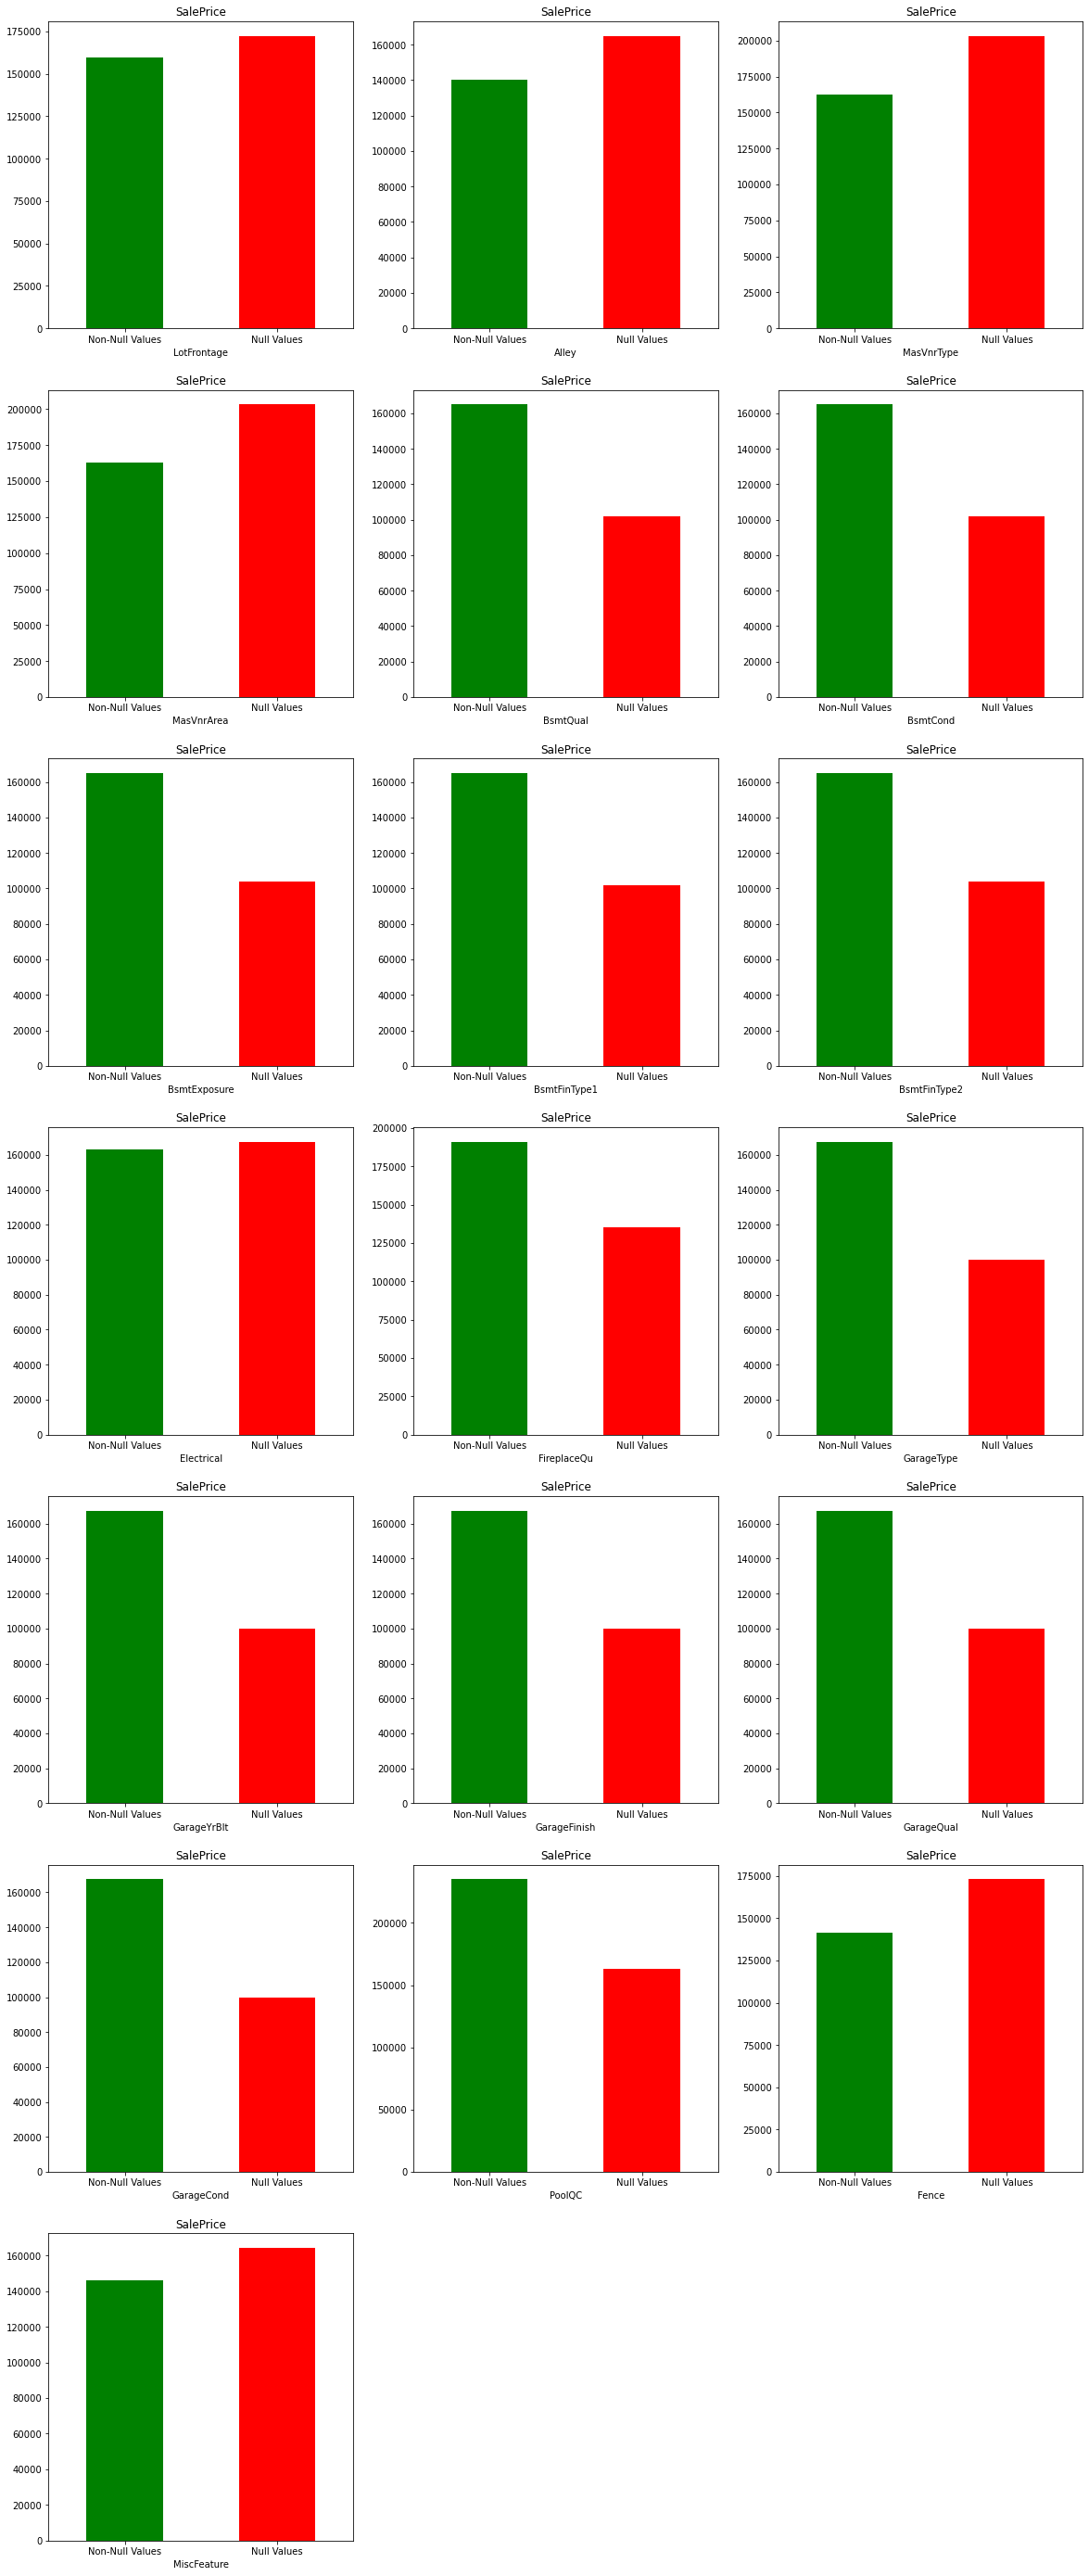

In [12]:
# Checking if NaN Values have any impact on the Sale Price or not
df_copy = df.copy()   
nan_col = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        nan_col.append(i)

fig,axs= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for i,ax in zip(nan_col,axs.flatten()):    
    df_copy[i] = np.where(df_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
axs[6,1].set_axis_off()    
axs[6,2].set_axis_off() 
plt.show()

<b>Observations:</b>

- The NaN values have some impact on the Sale Price. So, we have to handle the missing values instead of removing them.

In [13]:
# visualise the numerical variables
df[num_features].head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Text(0.5, 1.0, 'House Price vs YearSold')

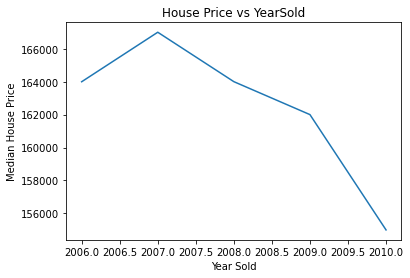

In [14]:
## Check for relation between Median House Price and the sales price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

<b>Observations:</b>

- Average process decreases after 2007 and the house prices dropped significantly. 
- Thus the year in which the house was sold has a considerable effect on the sale price.

In [15]:
# Create list of variables that contain year information
year_feature = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

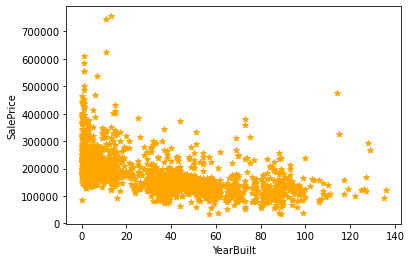

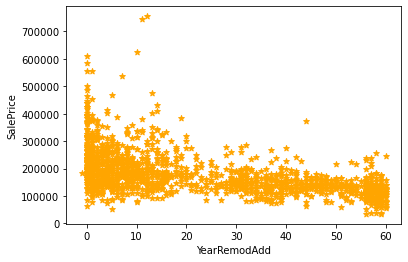

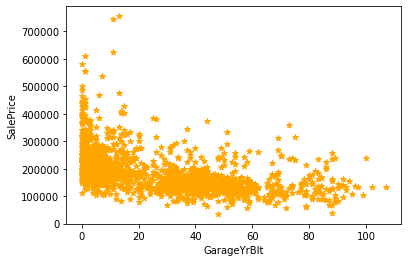

In [16]:
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'],marker ="*", color = 'orange')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


<b>Observations:</b>

- New properties are much costlier than the old properties.

In [17]:
# We will drop the 'Id' column since it's not necessary for the prediction process.
df.drop('Id', axis=1, inplace=True)

In [18]:
df_num = df.select_dtypes(include=['int64','float64'])
df_categorical = df.select_dtypes(exclude=['int64','float64'])


In [19]:
corr = df_num.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In next step, We will analyze the features correlation with sales price

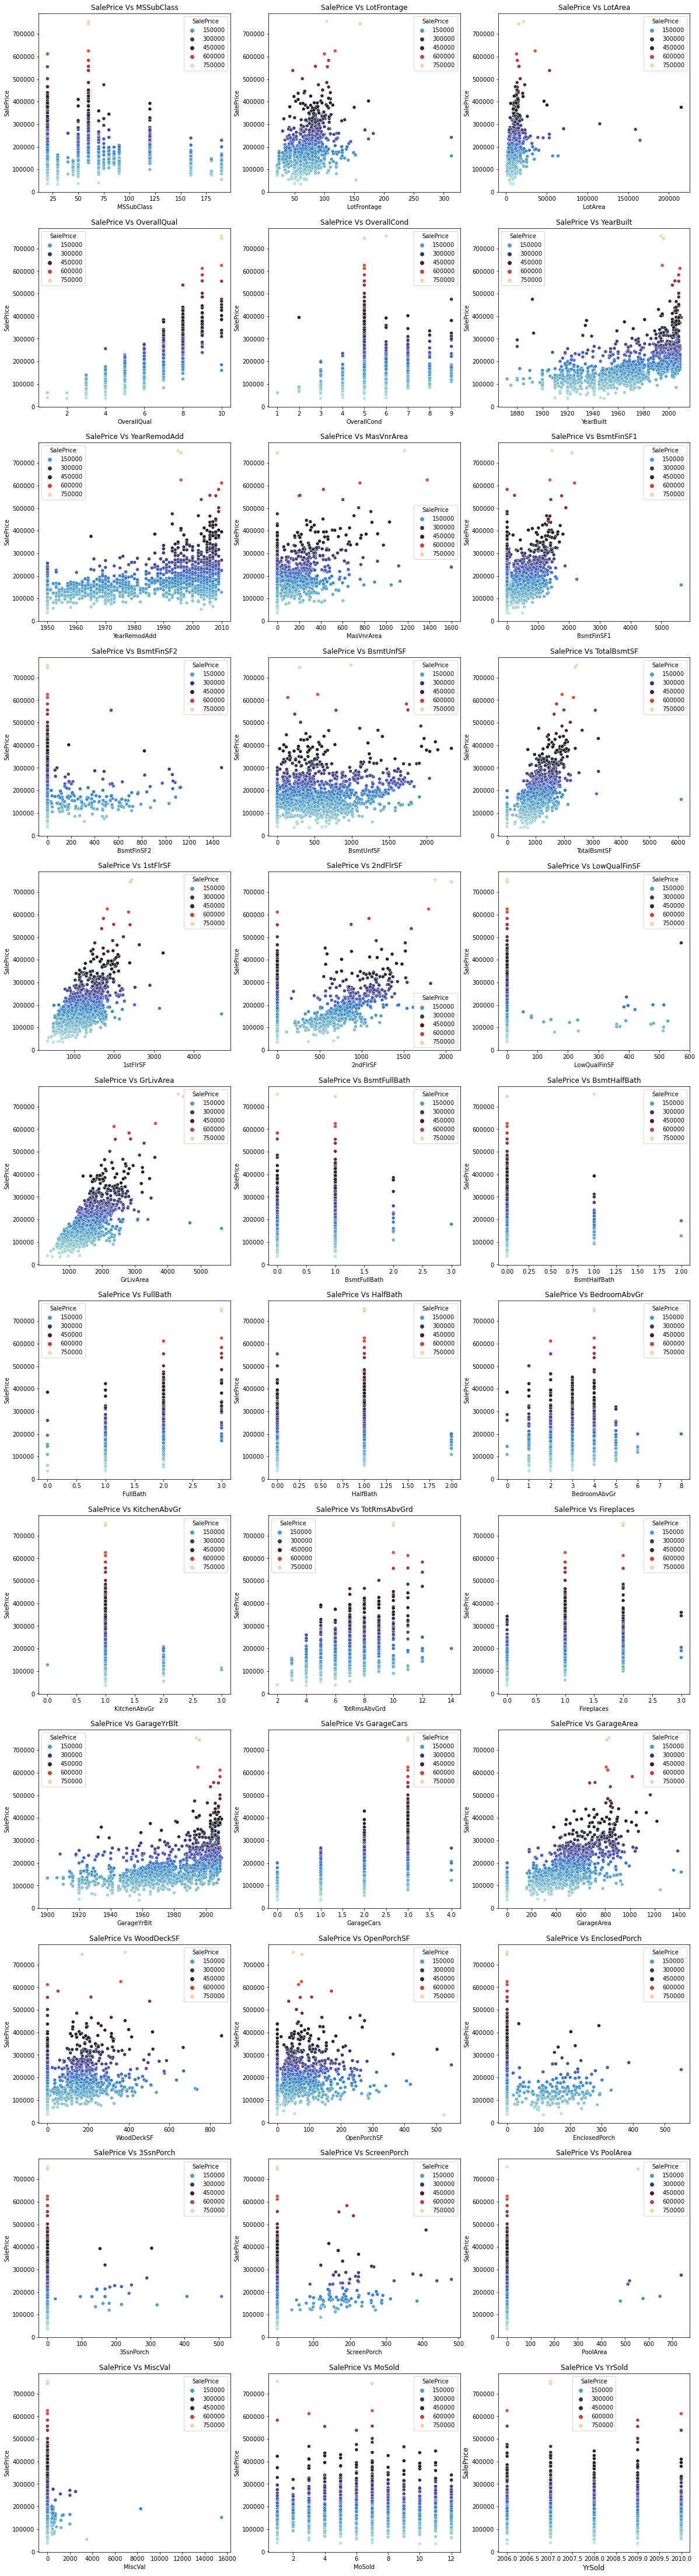

In [20]:
#Visualising numerical predictor variables with Target Variables
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice Vs '+str(i))

<b>Observations</b>

- From yearbuilt, we can see that New properties are costlier than older properties.
- SalePrice varies directly with the Overall quality
- TotalBsmtSF is directly proportional to the sales price.
- GRLivArea has a direct correlation with the price of the property. We will also get rid of the outliers which severely affect the prediction of the survival rate.
- GarageArea and SalePrice are directly proportional. We will again get rid of the outliers.
- There is no impact of MonthSold on the Sales Price.
- As there is no clear distribution for following features. So, lets convert into categorical feature:
    - MsSubClass
    - MoSold 
    - YrSold 

- From the above plot we can see that there are outliers present for:
    - OverallQual, LotFrontage, GrLiveArea, GarageArea
    - LotArea, YearBuilt, TotalBsmtSF, 1stFlrSF

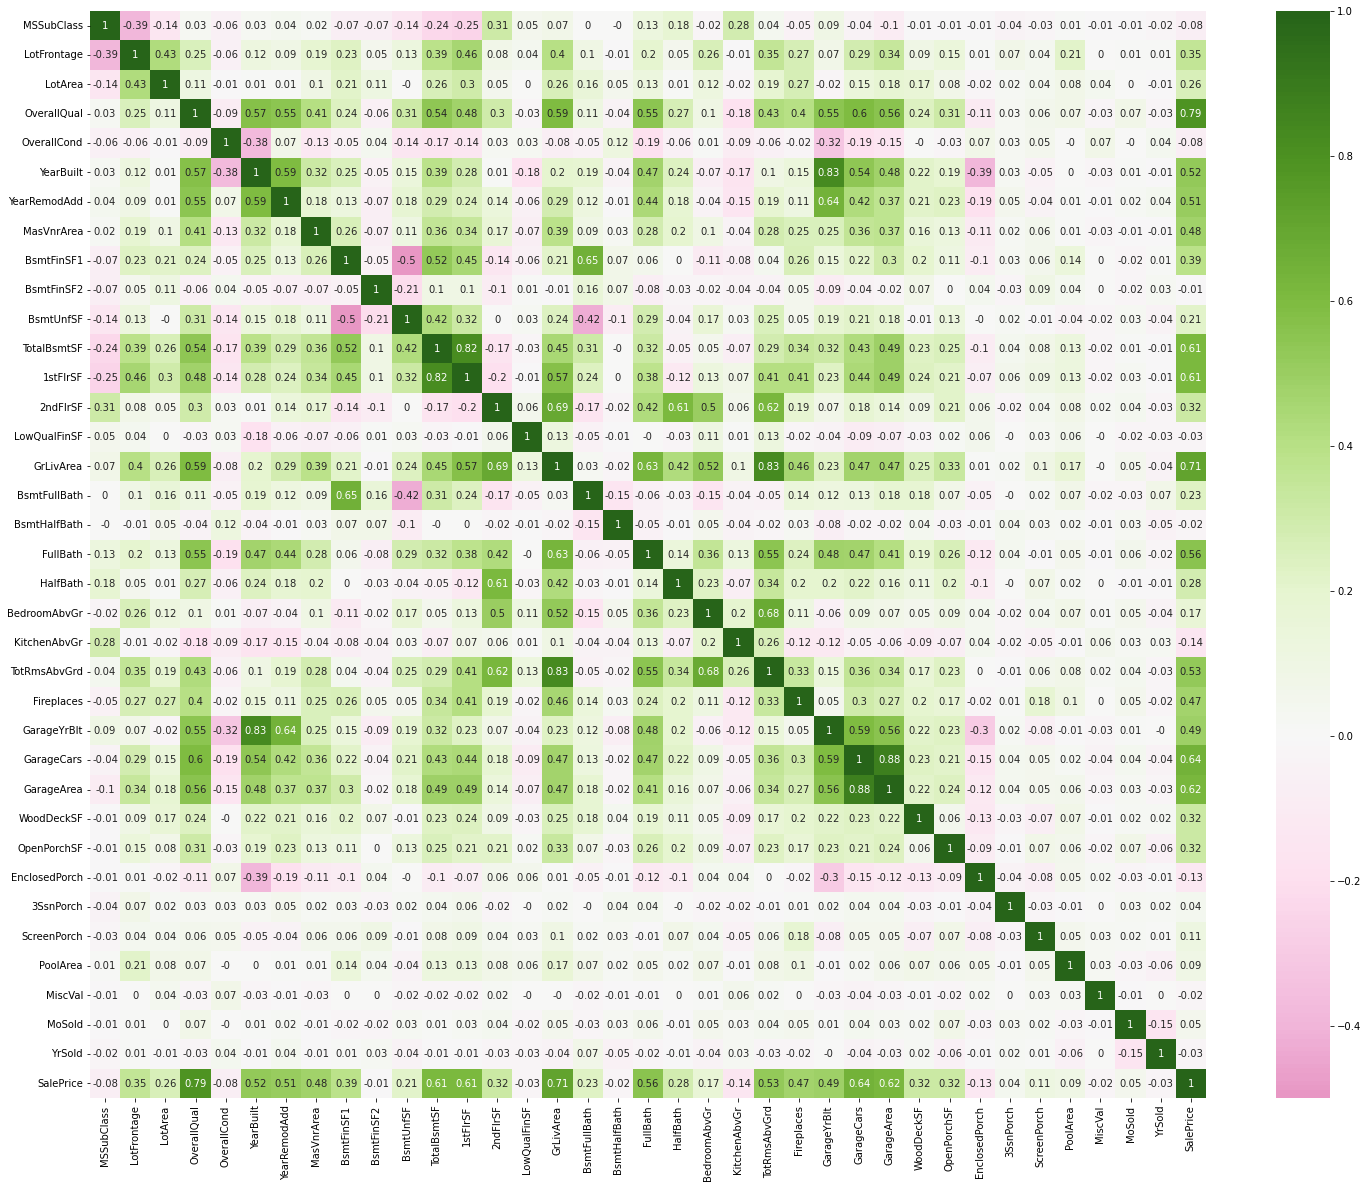

In [21]:
# Checking the corelation of numerical features
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='PiYG' , annot=True, center = 0)
plt.show()

<b>Observations </b>

- There are highly correlated features which we will remove it.

In [22]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

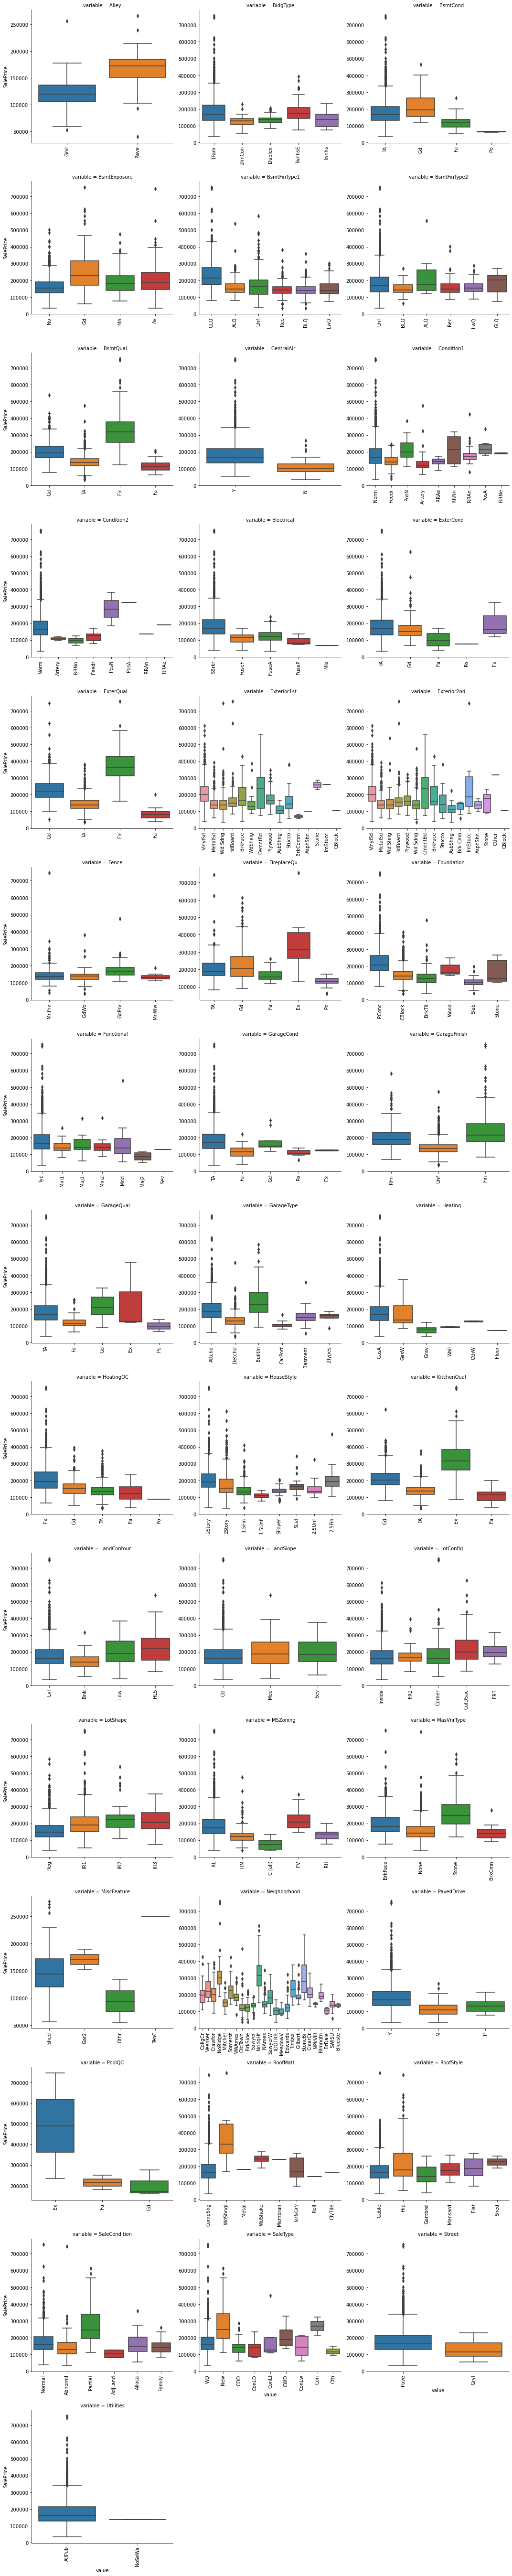

In [23]:
# Plotting Categorical Features with Sale Price  
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[cat_features]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

<b> Observations </b>
    
- From the above plot we can see that there are outliers in most of the features. We will handle them by capping to lower percentile.
- Paved alleys properties demand a higher price.
- Home with SaleType "New" have high sale price in comparison to others.
- Home was not completed when last assessed have much higher price in comparison to others. 
- Following features having good and excellent quality leads to higher prices of house sold:
    - Basement
    - Garages
    - Kitchen
    - Utilities with all public properties

###  3) Data Processing

In [24]:
missing_data = pd.DataFrame({'Missing Ratio' :get_missingvalues()})
missing_data

,Missing Ratio
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


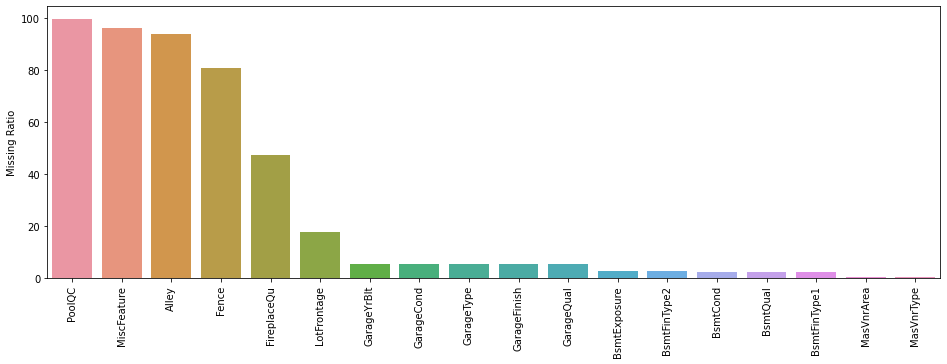

In [25]:
plt.figure(figsize = (16,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = missing_data.index , y = missing_data["Missing Ratio"] )

<b>Observation:</b>

- There are lots of missing values in more than 5 features. 
- Instead of dropping rows or columns, we will impute the NaN values with their Default specified in provided data description file.

In [26]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [27]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [28]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

### Replacing the missing values with appropriate values

From the data definition , the missing values are replaced with appropriate values:
- Missing values in `Alley` column is **No alley access**
- Missing values in `GarageType` and `GarageFinish` is **No Garage**, but these missing values are replaced with **-1** to maintain the uniformity when labelencoding is done on other **Garage** related columns.
- Missing values in `MiscFeature` is **None**.

In [29]:
#From the Data Description
df['Alley'].fillna('No alley access',inplace=True)
df[['GarageType','GarageFinish']].fillna(-1,inplace=True)
df['MiscFeature'].fillna('None',inplace=True)


Replacing the missing values in Categorical values with **'-1'** value, which will be later used to encode the ordinal categorical values.

In [30]:
replace_na_with_minus = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                         'GarageQual','GarageCond','PoolQC','Fence']
for i in replace_na_with_minus:
    df[i].fillna('-1',inplace=True)

##### Label Encoding the Ordinal Categorical columns

To reduce the number of columns while creating the dummies for the dataset, all the ordinal categorical variables are label encoded.

In [31]:
ordinal_columns = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
                   'GarageQual','GarageCond','PoolQC']
encode_dict = {'Ex': 4,
             'Gd': 3,
             'TA': 2,
             'Fa': 1,
             'Po': 0,
             '-1':-1}
for i in ordinal_columns:
    df[i] = df[i].map(encode_dict)
    print(df[i].value_counts())

2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64
2    1282
3     146
1      28
4       3
0       1
Name: ExterCond, dtype: int64
 2    649
 3    618
 4    121
-1     37
 1     35
Name: BsmtQual, dtype: int64
 2    1311
 3      65
 1      45
-1      37
 0       2
Name: BsmtCond, dtype: int64
4    741
2    428
3    241
1     49
0      1
Name: HeatingQC, dtype: int64
2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64
-1    690
 3    380
 2    313
 1     33
 4     24
 0     20
Name: FireplaceQu, dtype: int64
 2    1311
-1      81
 1      48
 3      14
 4       3
 0       3
Name: GarageQual, dtype: int64
 2    1326
-1      81
 1      35
 3       9
 0       7
 4       2
Name: GarageCond, dtype: int64
-1    1453
 3       3
 4       2
 1       2
Name: PoolQC, dtype: int64


In [32]:
exposure_dict = {'Gd':3,
                 'Av':2,
                 'Mn':1,
                 'No':0,
                 '-1':-1}
df['BsmtExposure'] = df['BsmtExposure'].map(exposure_dict) 
df['BsmtExposure'].value_counts()

 0    953
 2    221
 3    134
 1    114
-1     38
Name: BsmtExposure, dtype: int64

In [33]:
finType_columns = ['BsmtFinType1','BsmtFinType2']
finType_dict = {'GLQ':5,
                 'ALQ':4,
                 'BLQ':3,
                 'Rec':2,
                 'LwQ':1,
                 'Unf':0,
                 '-1':-1}
for i in finType_columns:
    df[i] = df[i].map(finType_dict)
    print(df[i].value_counts())

 0    430
 5    418
 4    220
 3    148
 2    133
 1     74
-1     37
Name: BsmtFinType1, dtype: int64
 0    1256
 2      54
 1      46
-1      38
 3      33
 4      19
 5      14
Name: BsmtFinType2, dtype: int64


In [34]:
fence_dict = {'GdPrv':5,
              'MnPrv':4,
              'GdWo':3,
              'MnWw':2,
              '-1':-1}
df['Fence'] = df['Fence'].map(fence_dict)
df['Fence'].value_counts()

-1    1179
 4     157
 5      59
 3      54
 2      11
Name: Fence, dtype: int64

In [35]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

##### Dropping the columns with missing value greater than 35%

In [36]:
for i in df.columns:
    missing_per = df[i].isnull().sum() / len(df) * 100.00
    if(missing_per > 35):
        print(i,":",missing_per)
        df.drop(i,axis=1,inplace=True)

There are none of the columns have missing values greater than 35%.

#### Imputing in Categorical columns

In [37]:
# Creating a list which contains all the categorical variables
categorical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)

In [38]:
for i in categorical_columns:
    if(df[i].isnull().sum()>0):
        print("======================================")
        print(i,":",df[i].isnull().sum() / len(df) * 100.00)
        print(df[i].value_counts())

MasVnrType : 0.547945205479452
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Electrical : 0.0684931506849315
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
GarageType : 5.5479452054794525
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
GarageFinish : 5.5479452054794525
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [39]:
for i in categorical_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    

In [40]:
# The missing values in the numeric columns are replaced with the respective mean
for i in df.columns:
    if(df[i].dtype != 'O' and df[i].isnull().sum()>0):
        df[i].fillna(df[i].mean(),inplace=True)

In [41]:
df.isnull().sum().sum()

0

###  4) Fix Feature Skewness

##### Dropping the numerical columns if the `value_counts` of a individual value is greater than 96%

In [42]:
print("The columns which are skewed: One of the value if more than 96% ")
count = 0
for i in categorical_columns:
    if df[i].value_counts()[0]/len(df) * 100 > 96:
        df.drop(i,axis=1,inplace=True)
        categorical_columns.remove(i)
        print(i)

The columns which are skewed: One of the value if more than 96% 
Street
Utilities
Condition2
RoofMatl
Heating
MiscFeature


In [43]:
count = 0
print("The numeric columns where a individual value frequency is greater than 96% are: ")
for i in df.columns:
    if df[i].dtype != 'O':
        if(df[i].value_counts().values[0] > 0.96*len(df)):
            print(i)
            df.drop(i,axis=1,inplace=True)

The numeric columns where a individual value frequency is greater than 96% are: 
LowQualFinSF
3SsnPorch
PoolArea
PoolQC
MiscVal


##### Changing the categorical column values to Others if it's percentage is <= 1

In [44]:
for i in categorical_columns:
    # Assigning the value as index and value counts to a series
    value_count_series = round(df[i].value_counts() / len(df) * 100,2)
    if len(value_count_series) > 3:
        # Setting a threshold of 1% , the below line will return the boolean array
        threshold = value_count_series <= 1.0
        # Getting the index of the value_counts less than or equal to 1%
        index_of_replacement_values = value_count_series[threshold].index
        if(len(index_of_replacement_values)>0):
            # Creating a dictionary which is less than 1% and replacing it with value 'Others'
            replacement_dict = dict.fromkeys(index_of_replacement_values, 'Others')
            # Updating the data frame: Replacing the values in the df which are in the dictionary replacement_dict with dict value Others
            #ex : df['LotShape'] = df['LotShape'].replace('IR3','Others') 
            df[i] = df[i].replace(replacement_dict) 
            print("======================")
            print(df[i].value_counts())

RL        1151
RM         218
FV          65
RH          16
Others      10
Name: MSZoning, dtype: int64
Reg       925
IR1       484
IR2        41
Others     10
Name: LotShape, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
Others        4
Name: LotConfig, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Others      22
MeadowV     17
Blmngtn     17
BrDale      16
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery      48
Others      26
RRAn        26
PosN        19
Name: Condition1, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
Others     33
Name: HouseStyle, dtype: int64
Gable     1141
Hip        286
Others      33
Name: RoofStyle, dtype: int64
VinylSd    5

##### Checking if the target Sales variable is normally distributed


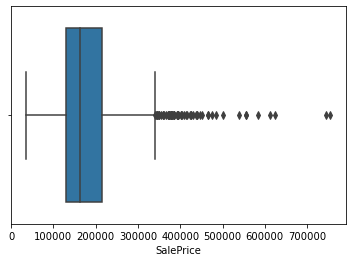

In [45]:
sns.boxplot(df['SalePrice'])
plt.show()

There are outliers present in the target variable and handling outliers by capping or dropping will lead to limiting the data or loose the data respectively. Hence we need transform the target variable.

In [46]:
df['SalePrice'] = np.log(df['SalePrice'])

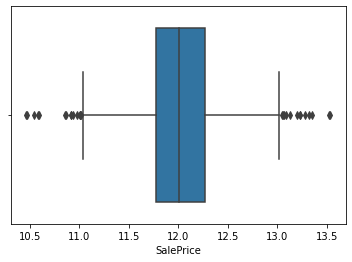

In [47]:
sns.boxplot(df['SalePrice'])
plt.show()

##### Year columns

We have the `YearBuilt` attribute from which we can calculate the age of the house(`AgeOfHouse`) and then drop the redundant `YearBuilt` column.

In [48]:
import datetime
present_year = datetime.date.today().year

In [49]:
df['AgeOfHouse'] = present_year - df['YearBuilt']
df.drop('YearBuilt',axis=1,inplace=True)

In [50]:
#Dropping the other redundant year columns from the dataset.
df.drop(['YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [51]:
df.shape

(1460, 66)

###  5) Data Preparation

In [52]:
y = df['SalePrice']
df.drop('SalePrice',axis=1,inplace=True)
X = df   

In [53]:
# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,No alley access,Reg,Lvl,FR2,Gtl,Others,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [54]:
# convert into dummies 
encdf_categorical = pd.get_dummies(df_categorical, drop_first=True)
encdf_categorical.head()

,MSZoning_Others,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_Others,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Others,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Slab,CentralAir_Y,Electrical_FuseF,Electrical_Others,Electrical_SBrkr,Functional_Min2,Functional_Mod,Functional_Others,Functional_Typ,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [55]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [56]:
# concat dummy variables with X
X = pd.concat([X, encdf_categorical], axis=1)

In [57]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
corr_result[(abs(corr_result) > 0.6)]

OverallQual            ExterQual                0.726278
                       BsmtQual                 0.629379
                       KitchenQual              0.673331
                       GarageCars               0.600671
MasVnrArea             MasVnrType_None         -0.685770
ExterQual              KitchenQual              0.716122
                       Foundation_PConc         0.604901
BsmtQual               BsmtCond                 0.633713
                       AgeOfHouse              -0.602797
BsmtCond               Foundation_Slab         -0.687403
BsmtFinType1           BsmtFinSF1               0.695751
BsmtFinSF1             BsmtFullBath             0.649212
BsmtFinType2           BsmtFinSF2               0.788986
TotalBsmtSF            1stFlrSF                 0.819530
2ndFlrSF               GrLivArea                0.687501
                       HalfBath                 0.609707
                       TotRmsAbvGrd             0.616423
                       HouseSty

In [58]:
# Chekcing the shape 
X.shape

(1460, 148)

### Scaling the variables

In [59]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [60]:
 # Converting the arrays to a dataframe
X = pd.DataFrame(X)
X.columns = cols
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,AgeOfHouse,MSZoning_Others,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_Others,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Others,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Slab,CentralAir_Y,Electrical_FuseF,Electrical_Others,Electrical_SBrkr,Functional_Min2,Functional_Mod,Functional_Others,Functional_Typ,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.12250,0.666667,0.5,0.8,0.75,0.25,1.000000,0.125089,0.166667,0.0,0.064212,0.140098,1.00,0.119780,0.413559,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,0.000000,0.0,0.50,0.386460,0.6,0.6,0.000000,0.111517,0.000000,0.0,0.0,0.090909,0.050725,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.00000,0.333333,0.5,0.8,0.75,1.00,0.833333,0.173281,0.166667,0.0,0.121575,0.206547,1.00,0.212942,0.000000,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.333333,0.6,0.50,0.324401,0.6,0.6,0.347725,0.000000,0.000000,0.0,0.0,0.363636,0.246377,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.10125,0.666667,0.5,0.8,0.75,0.50,1.000000,0.086109,0.166667,0.0,0.185788,0.150573,1.00,0.134465,0.419370,0.273549,0.333333,0.0,0.666667,0.5

In [61]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [62]:
X_train.shape

(1021, 148)

###  5) Model Building and Evaluation

- Ridge regularisation doesn't make any of the variables to 0.
- As there is a limitaion of Lasso Regularisation on how much variables it can penalise to 0.
<br/>To avoid the above limitations, before using Regularisation top 50 variables are selected using RFE(Recursive Feature Elimination)

##### RFE (Recursive Feature Elimination)
Since the data set as 148 columns we cannot follow the manual approach to select the variables. Hence we need to use RFE to select top 50 variables.

In [63]:
# Fit the linear regression model on the trained data set
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE with the 50 variables
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [64]:
col_selected_RFE  = X_train.columns[rfe.support_]
col_selected_RFE

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageCars', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'ScreenPorch', 'AgeOfHouse', 'MSZoning_Others',
       'LotShape_Others', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAn', 'BldgType_2fmCon',
       'BldgType_Twnhs', 'Exterior1st_BrkFace', 'Foundation_Others',
       'Functional_Mod', 'Functional_Others', 'SaleCondition_Partial'],
      dtype='object')

In [65]:
# The X_train is updated with RFE selected columns
X_train_RFE = X_train[col_selected_RFE]

In [66]:
X_train_RFE.shape

(1021, 50)

In [67]:
# The X_test is updated with RFE selected columns
X_test_RFE = X_test[col_selected_RFE]

In [68]:
X_test_RFE.shape

(438, 50)

#### Linear Regression


In [69]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_RFE, y_train)

LinearRegression()

In [70]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10.765563768338456
[-0.16945526 -0.11030326  0.30990278  0.46746293  0.34531115  0.0992512
  0.07446051  0.07645872 -0.05578934  0.0279737   0.01383281 -0.03949728
  0.06313699  0.23513836  0.96923086  0.15224213  0.1315079   0.0658559
 -0.12527748  0.05732691  0.17131292  0.07807009  0.21694468  0.22641447
 -0.19160917  0.06487488  0.09476518 -0.35282675 -0.37820258 -0.125836
  0.1086007   0.14811527  0.10012013  0.11829857  0.17524222 -0.09196881
  0.10654853  0.14026667  0.09014152  0.10698117  0.14550578  0.06570395
  0.07620237  0.11624301 -0.08494512  0.10901415  0.06527237 -0.12123563
 -0.12741136  0.01367237]


In [71]:
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
# Prediction on the Train data set
y_pred_train = lm.predict(X_train_RFE)

# Prediction on the Test data set
y_pred_test = lm.predict(X_test_RFE)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train data set :"+str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test data set :"+str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score train data set:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score test data set:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE score train data set:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RSS score test data set:",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_score train data set :0.9059874313719478
r2_score test data set :0.893900281052318
RSS score train data set: 15.088287943441753
RSS score test data set: 7.646455132227437
MSE score train data set: 0.014777950973008573
RSS score test data set: 0.01745766011924072


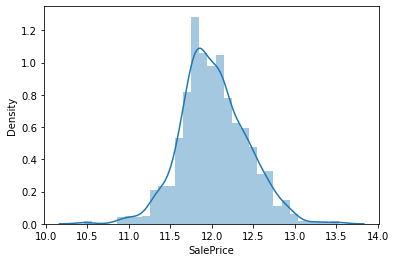

In [73]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

<b> Observation </b>

- We can see data is is transformed.

In [74]:
betas = pd.DataFrame(index=X_train_RFE.columns)
betas.rows = X.columns

In [75]:
betas['Linear'] = lm.coef_
betas['Linear'].sort_values(ascending=False)[0:5]

GrLivArea      0.969231
OverallQual    0.467463
OverallCond    0.345311
LotArea        0.309903
1stFlrSF       0.235138
Name: Linear, dtype: float64

In [76]:
betas['Linear'].sort_values(ascending=False)[-5:]

Functional_Others   -0.127411
MSSubClass          -0.169455
GarageCond          -0.191609
AgeOfHouse          -0.352827
MSZoning_Others     -0.378203
Name: Linear, dtype: float64

From the above 2 outputs it is clear that the top 5 most important predictor variable is 
- `GrLivArea`
- `OverallQual`
- `LotArea`
- `OverallCond`
- `1stFlrSF`

#### Ridge Regression

In [77]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds =11
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_RFE, y_train) 

Fitting 11 folds for each of 28 candidates, totalling 308 fits


GridSearchCV(cv=11, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [79]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_RFE, y_train)
print(ridge.coef_)

[-0.16897986 -0.10892187  0.30824321  0.46778125  0.34503639  0.09916726
  0.07443686  0.07638205 -0.05456259  0.02823266  0.0138983  -0.03827657
  0.06323989  0.23624745  0.96208127  0.15205015  0.13257743  0.06651501
 -0.12554622  0.05759127  0.173248    0.07821971  0.21694467  0.22397629
 -0.18894512  0.06503587  0.0946196  -0.35189761 -0.3776025  -0.12565591
  0.10849023  0.1480979   0.09996026  0.11837903  0.17516431 -0.09184456
  0.10691846  0.1400801   0.09012659  0.10693328  0.14538925  0.0656071
  0.07614238  0.11594238 -0.08496136  0.10886333  0.0655257  -0.12095989
 -0.1271647   0.01368818]


In [80]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_RFE)
y_pred_test = ridge.predict(X_test_RFE)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train data set :"+str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test data set :"+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score train data set:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score test data set:",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE score train data set:",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RSS score test data set:",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_score train data set :0.905986891723066
r2_score test data set :0.8939305548440468
RSS score train data set: 15.088374552900842
RSS score test data set: 7.644273343317593
MSE score train data set: 0.014778035801078199
RSS score test data set: 0.017452678866021903


In [81]:
betas['Ridge'] = ridge.coef_
betas['Ridge'].sort_values(ascending=False)[0:5]

GrLivArea      0.962081
OverallQual    0.467781
OverallCond    0.345036
LotArea        0.308243
1stFlrSF       0.236247
Name: Ridge, dtype: float64

In [82]:
betas['Ridge'].sort_values(ascending=False)[-5:]

Functional_Others   -0.127165
MSSubClass          -0.168980
GarageCond          -0.188945
AgeOfHouse          -0.351898
MSZoning_Others     -0.377602
Name: Ridge, dtype: float64

From the above 2 outputs it is clear that the top 5 most important predictor variable is 
- `GrLivArea`
- `OverallQual`
- `LotArea`
- `OverallCond`
- `1stFlrSF`

In [83]:
ridge

Ridge(alpha=0.01)

#### Lasso Regression

In Ridge regression the variable elimination is not available, hence to reduce the model complexity, Lasso Regression is used.

In [84]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001,0.003,0.004, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_RFE, y_train)

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_RFE, y_train) 

Fitting 11 folds for each of 30 candidates, totalling 330 fits
{'alpha': 0.0001}


Lasso(alpha=0.0001)

In [85]:
lasso.coef_

array([-0.16390315, -0.06993153,  0.25220528,  0.48068107,  0.34253486,
        0.09150321,  0.07446464,  0.0736591 , -0.        ,  0.03184643,
        0.02019279, -0.        ,  0.06422266,  0.1763039 ,  0.94858574,
        0.14382199,  0.13623494,  0.06421545, -0.09074694,  0.05847875,
        0.16644935,  0.08345826,  0.21802519,  0.08779151, -0.04788618,
        0.06532774,  0.0864396 , -0.34576643, -0.36586962, -0.11811124,
        0.09990086,  0.14408661,  0.09282385,  0.11435305,  0.16951522,
       -0.07904668,  0.10291077,  0.13455226,  0.08018999,  0.10329873,
        0.13725982,  0.06400947,  0.06950032,  0.10745767, -0.08339589,
        0.10576304,  0.04428951, -0.10325295, -0.11706972,  0.01366425])

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_RFE)
y_pred_test = lasso.predict(X_test_RFE)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train data set :"+str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test data set :"+str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score train data set:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score test data set:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE score train data set:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RSS score test data set:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_score train data set :0.9055316795730356
r2_score test data set :0.8948209441734151
RSS score train data set: 15.161432571581155
RSS score test data set: 7.580104256681418
MSE score train data set: 0.01484959115727831
RSS score test data set: 0.017306174102012368


In [87]:
betas['Lasso'] = lasso.coef_
betas['Lasso'].sort_values(ascending=False)[0:5]

GrLivArea      0.948586
OverallQual    0.480681
OverallCond    0.342535
LotArea        0.252205
GarageCars     0.218025
Name: Lasso, dtype: float64

In [88]:
betas['Lasso'].sort_values(ascending=False)[-5:]

Functional_Others   -0.117070
LotShape_Others     -0.118111
MSSubClass          -0.163903
AgeOfHouse          -0.345766
MSZoning_Others     -0.365870
Name: Lasso, dtype: float64

From the above 2 outputs it is clear that the top 5 most important predictor variable is 
- `GrLivArea`
- `OverallQual`
- `OverallCond`
- `LotArea`
- `GarageCars`

In [89]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.905987,0.905987,0.905532
1,R2 Score (Test),0.893900,0.893931,0.894821
2,RSS (Train),15.088288,15.088375,15.161433
3,RSS (Test),7.646455,7.644273,7.580104
4,MSE (Train),0.121565,0.121565,0.121859
5,MSE (Test),0.132127,0.132109,0.131553


<b>Conclusions: </b>

- R2 score for both Ridge and Lasso Models are 0.89 approx on test data and 0.90 on train data. 
- Following variables are significant in predicting the price of a house:- 
    - Total Garage Area
    - Total Rooms
    - Overall Condition
    - Lot Area
    - Garage Cars
    - Lot Frontage


# Subjective Questions 

#### Question 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans: The Optimal value of alpha for ridge is 0.01 and for lasso it is 0.0001. If we double the value of alpha

In [90]:
#Fitting Ridge model for alpha = 0.01 * 2 and printing coefficients which have been penalised

alpha = 0.01*2
ridge_alpha_double = Ridge(alpha=alpha)

ridge_alpha_double.fit(X_train_RFE, y_train)
print(ridge_alpha_double.coef_)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_alpha_double.predict(X_train_RFE)
y_pred_test = ridge_alpha_double.predict(X_test_RFE)

metric_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train data set :"+str(r2_train_lr))
metric_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test data set :"+str(r2_test_lr))
metric_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score train data set:",rss1_lr)
metric_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score test data set:",rss2_lr)
metric_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE score train data set:",mse_train_lr)
metric_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RSS score test data set:",mse_test_lr)
metric_double.append(mse_test_lr**0.5)



[-0.16851465 -0.10756521  0.30660499  0.46808716  0.34476342  0.09908388
  0.0744148   0.07630753 -0.05335055  0.02848875  0.01396716 -0.03706887
  0.06334157  0.23730712  0.95508011  0.15186141  0.13362681  0.06716078
 -0.12579619  0.05785372  0.17513773  0.07836837  0.21694429  0.22159892
 -0.18634374  0.06519554  0.09447635 -0.35098454 -0.377007   -0.12547612
  0.10837993  0.1480782   0.09980181  0.11845687  0.1750875  -0.09172209
  0.10728085  0.13989676  0.09011088  0.10688563  0.14527304  0.06551213
  0.07608307  0.11564555 -0.08497699  0.10871566  0.06577101 -0.12068662
 -0.12692109  0.01370428]
r2_score train data set :0.9059853120759402
r2_score test data set :0.8939589551222064
RSS score train data set: 15.0886280740101
RSS score test data set: 7.642226575853525
MSE score train data set: 0.014778284107747404
RSS score test data set: 0.017448005880944122


In [91]:
betas['ridge_alpha_double'] = ridge_alpha_double.coef_
print(betas['ridge_alpha_double'].sort_values(ascending=False)[0:5],'\n\n')
print(betas['ridge_alpha_double'].sort_values(ascending=False)[-5:])

GrLivArea      0.955080
OverallQual    0.468087
OverallCond    0.344763
LotArea        0.306605
1stFlrSF       0.237307
Name: ridge_alpha_double, dtype: float64 


Functional_Others   -0.126921
MSSubClass          -0.168515
GarageCond          -0.186344
AgeOfHouse          -0.350985
MSZoning_Others     -0.377007
Name: ridge_alpha_double, dtype: float64


In [92]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001 * 2

lasso_alpha_2 = Lasso(alpha=alpha)
lasso_alpha_2.fit(X_train_RFE, y_train) 

print(lasso_alpha_2.coef_,'\n\n')


# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_alpha_2.predict(X_train_RFE)
y_pred_test = lasso_alpha_2.predict(X_test_RFE)

lasso_metric_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_score train data set :"+str(r2_train_lr))
lasso_metric_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_score test data set :"+str(r2_test_lr))
lasso_metric_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score train data set:",rss1_lr)
lasso_metric_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score test data set:",rss2_lr)
lasso_metric_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE score train data set:",mse_train_lr)
lasso_metric_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RSS score test data set:",mse_test_lr)
lasso_metric_double.append(mse_test_lr**0.5)


[-0.16042426 -0.0255717   0.19893762  0.49453577  0.33834424  0.09483125
  0.07472531  0.07433334 -0.          0.02573631  0.01581451  0.
  0.06605663  0.16522707  0.92994831  0.14082741  0.13693001  0.06354309
 -0.05815832  0.05962399  0.15936598  0.08710281  0.2201698   0.04006766
 -0.          0.0666074   0.07886513 -0.33749298 -0.3533352  -0.1048561
  0.09024023  0.13765104  0.0851725   0.11197618  0.16437996 -0.06718198
  0.09950267  0.12930038  0.07174955  0.09949572  0.12831515  0.06296907
  0.06266568  0.09810972 -0.0801461   0.10269299  0.02337233 -0.0868008
 -0.10763196  0.01354561] 


r2_score train data set :0.9047310026018756
r2_score test data set :0.8947073218507499
RSS score train data set: 15.289935014040113
RSS score test data set: 7.5882928551140605
MSE score train data set: 0.014975450552438896
RSS score test data set: 0.017324869532223883


In [93]:
betas['lasso_alpha_2'] = lasso_alpha_2.coef_
betas['lasso_alpha_2'].sort_values(ascending=False)[0:5]

GrLivArea      0.929948
OverallQual    0.494536
OverallCond    0.338344
GarageCars     0.220170
LotArea        0.198938
Name: lasso_alpha_2, dtype: float64

In [94]:
betas['lasso_alpha_2'].sort_values(ascending=False)[-5:]

LotShape_Others     -0.104856
Functional_Others   -0.107632
MSSubClass          -0.160424
AgeOfHouse          -0.337493
MSZoning_Others     -0.353335
Name: lasso_alpha_2, dtype: float64

In [95]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_2 = pd.Series(metric_double, name = 'Ridge Regression alpha * 2')
lg_metric_2 = pd.Series(lasso_metric_double, name = 'Lasso Regression alpha * 2')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_2,lg_metric_2], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression alpha * 2,Lasso Regression alpha * 2
0,R2 Score (Train),0.905987,0.905987,0.905532,0.905985,0.904731
1,R2 Score (Test),0.893900,0.893931,0.894821,0.893959,0.894707
2,RSS (Train),15.088288,15.088375,15.161433,15.088628,15.289935
3,RSS (Test),7.646455,7.644273,7.580104,7.642227,7.588293
4,MSE (Train),0.121565,0.121565,0.121859,0.121566,0.122374
5,MSE (Test),0.132127,0.132109,0.131553,0.132091,0.131624


#### Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


The optimal value of lambda for ridge and lasso are 0.01 and 0.0001 respectively. The value of lambda 0.01 is choosen because as the value of lambda is low, then the shrinkage penalty will decrease and it itends towards zero. 

Also, the alpha value was quite small, doubling it does not do any significant change in both the models and the R2 and MSE remains almost the same. The most important predictor variables also remain the same, but the GarageCars attribute gains higher importance than Lot Area in the Lasso Model.


#### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [96]:
betas['lasso_alpha_2'].sort_values(ascending=False)[0:5]

GrLivArea      0.929948
OverallQual    0.494536
OverallCond    0.338344
GarageCars     0.220170
LotArea        0.198938
Name: lasso_alpha_2, dtype: float64

In [97]:
X_train_RFE.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','LotArea'], axis=1, inplace=True)

In [98]:
lasso_quest_3 = Lasso()
params = {'alpha': [0.0001, 0.001,0.003,0.004, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso_quest_3, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_RFE, y_train)

Fitting 11 folds for each of 30 candidates, totalling 330 fits


GridSearchCV(cv=11, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.003, 0.004, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [100]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha =0.0001
lasso_quest_3 = Lasso(alpha=alpha)
lasso_quest_3.fit(X_train_RFE, y_train) 

print(lasso_quest_3.coef_,'\n\n')

[-0.10804285  0.00807054  0.20869433  0.10784699  0.06979124  0.
  0.03235236 -0.          0.          0.10432339  0.69003502  0.10971324
  0.33534464  0.18191947 -0.33805225  0.21287058  0.54873743  0.11438491
  0.29100618 -0.04343668  0.10251366  0.08072696 -0.18908724 -0.45134282
 -0.11547671  0.12897393  0.16790095  0.09021347  0.10001152  0.1860445
 -0.15394986  0.20566687  0.15682495  0.08088608  0.13215799  0.18139473
  0.04533652  0.08061424  0.09382184 -0.08243118  0.08476361  0.179887
 -0.14864509 -0.171081    0.00677533] 




In [101]:
betas_2 = pd.DataFrame(index=X_train_RFE.columns)
betas_2['lasso_quest_3'] = lasso_quest_3.coef_
betas_2['lasso_quest_3'].sort_values(ascending=False)[0:5]

1stFlrSF        0.690035
TotRmsAbvGrd    0.548737
FullBath        0.335345
GarageQual      0.291006
KitchenQual     0.212871
Name: lasso_quest_3, dtype: float64

In [102]:
betas_2['lasso_quest_3'].sort_values(ascending=False)[-5:]

Neighborhood_MeadowV   -0.153950
Functional_Others      -0.171081
AgeOfHouse             -0.189087
KitchenAbvGr           -0.338052
MSZoning_Others        -0.451343
Name: lasso_quest_3, dtype: float64

### END OF SUBJECTIVE QUESTIONS HERE

In [103]:
print('Lasso Original')
betas['Lasso'].sort_values(ascending=False)[0:5]

Lasso Original


GrLivArea      0.948586
OverallQual    0.480681
OverallCond    0.342535
LotArea        0.252205
GarageCars     0.218025
Name: Lasso, dtype: float64

In [104]:
print('Lasso Alpha Double')
betas['lasso_alpha_2'].sort_values(ascending=False)[0:5]


Lasso Alpha Double


GrLivArea      0.929948
OverallQual    0.494536
OverallCond    0.338344
GarageCars     0.220170
LotArea        0.198938
Name: lasso_alpha_2, dtype: float64